<a href="https://colab.research.google.com/github/CataQM/CataQM/blob/main/optimizaci%C3%B3n_con_restricciones_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Catalina Quincosis Martínez
### 22/02/22
### Tercera entrega del curso de optimización (2021-1) de la universidad del valle, a cargo del profesor Miguel Angel Vargas Valencia.

Acontinuación se presentan dos problemas de optimización no lineal con restricciones mixtas donde se pondrá en comparación los métodos "trust-constr" y "SLSQP".



In [ ]:
#@title Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

# Optimización con restricciones

La optimización con restricciones es un proceso en el cual se maximiza o minimiza (dependiendo del problema)  una función objetivo que modela el problema que queremos solucionar. Más formalmente podemos hablar del planteamiento del problema como:

$$Max \ f(x_1,..., x_n)$$

sujeto  a
$$
g_1(x_1,..., x_n)\leq b_1\\
g_2(x_1,..., x_n)\leq b_2\\
.\\
.\\
.\\
g_m(x_1,..., x_n)\leq b_m$$

con $f:D\subset \mathbb{R}^n→\mathbb{R}$, $f\in C^2(D)$ y $D$ un conjunto abierto de $\mathbb{R}^n$, $g:D\subset\mathbb{R}^n→\mathbb{R}^m, g=(g_1,...,g_m), g_i\in C^2(D), \forall i=1,...,m,$ y $b=(b_1,...,b_m)\in \mathbb{R}^m$.

Las restricciones (las funciones $g_i$ con $i=1,...,m$) son condiciones que deben cumplir la solución para que satisfaga ciertos parámetros enlazados al problema; estas restricciones se pueden encontrar como restricciones de igualdad o restricciones de desigualdad, dado que la naturaleza de las misma está estrictamente relacionado con las problemáticas del problema trataremos de explicar sus diferencias y similitudes en el siguiente ejercicio.



In [ ]:
#@title Problema inicial
#Definimos nuestra función objetivo

def R(x):
  x1=x[0]
  x2=x[1]
  x3=x[2]
  return -x[0]*x[1]*(x[0]+x[1]+x[2])-x[2]

#También definimos nuestras restricciones
def restriccion1(x):
  return x[0]*x[1]*x[2]-25

def restriccion2(x):
  sum_sq = 40
  for i in range (3):
    sum_sq = sum_sq - x[i]**2
  return sum_sq  





# Problema inicial
## Minimizar
$$R(x_1,x_2,x_3)= -x_1x_2(x_1+x_2+x_3)-x_2$$
### Sujeto a:
$$x_1x_2x_3\leq 25$$


$$x_1^2+x_2^2+x_3^2=40$$

### cotas
$$1\leq x_1,x_2,x_3\leq 5$$

Aqui podemos notar que el problema de minimización cuenta con una restricción lineal y otra no lineal. En otras palabras estamos tratando con un problema con restricciones mixtas.

In [ ]:
#Definimos nuestro punto inicial x0
x0 = [1, 5, 5]
print(R(x0))

-60


**Función Objetivo:**

$$R(x_1,x_2,x_3)= -x_1x_2(x_1+x_2+x_3)-x_2$$

Jacobiano de R:

$$ J_{R} (x_1,x_2,x_3)= \begin{pmatrix} -2x_1x_2-x_2^2-x_2x_3 \\ -x_1^2-2x_1x_2-x_1x_2-1\\ -x_1x_2  \end{pmatrix}  $$ 

Hessiano de R:

$$ H_{R} (x_1,x_2,x_3)= \begin{pmatrix} -2x_2  & -2x_1-2x_2-x_3 & -x_2  \\ -2x_1-2x_2-x_3 & -2x_1 & -x_1\\ -x_2 & -x_1 & 0\end{pmatrix}  $$ 

In [ ]:
#Definimos las funciones de las matrices jacobiana y hessiana respectivamente.
#revise cómo se organizan esas posiciones de la matriz hessiana

def JR(x):
  der = np.zeros_like(x)
  der[0]= -2*x[0]*x[1]-x[1]**2-x[1]*x[2]
  der[1]= -x[0]**2-2*x[0]*x[1]-x[0]*x[1]-1
  der[2]= -x[0]*x[1]
  return der

def HR(x):
  x = np.asarray(x)
  H = [[-2*x[1], -2*x[0]-2*x[1]-x[2],-x[1]], 
       [-2*x[0]-2*x[1]-x[2], -2*x[0],-x[0]],
       [-x[1], -x[0], 0]]
  return H

In [ ]:
#Definimos las cotas para las variables 
b = (1.0, 5.0)
#cotas=optimize.Bounds([1, 3], [1, 3], [1, 2])
cotas = (b,b,b)

## Restricción lineal

In [ ]:
con1 = {'type': 'ineq', 'fun':restriccion1}

# Restricciones no lineales

In [ ]:
con2 = {'type': 'eq', 'fun':restriccion2}
cons = [con1, con2]

# Método trust-constr

In [ ]:
res2 = optimize.minimize(R, x0, method='trust-constr', jac=JR, hess=HR, constraints=cons, bounds=cotas)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [ ]:
print(res2)


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 167
      cg_stop_cond: 2
            constr: [array([0.60363783]), array([3.55271368e-15]), array([4.09758742, 4.62427869, 1.35123053])]
       constr_nfev: [956, 956, 0]
       constr_nhev: [0, 0, 0]
       constr_njev: [0, 0, 0]
    constr_penalty: 1.0
  constr_violation: 3.552713678800501e-15
    execution_time: 0.2876732349395752
               fun: -192.22015569468397
              grad: array([-65.52919228, -74.63538125, -18.94838619])
               jac: [array([[ 6.24846657,  5.53678515, 18.94838618]]), array([[-8.19517486, -9.24855745, -2.70246107]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])]
   lagrangian_grad: array([ 0.04478467, -0.0396511 , -0.00011203])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 239
              nhev: 32
               nit: 138
             niter: 

# Método SLSQP

In [ ]:
res = minimize(R,x0,method = 'SLSQP',
               bounds = cotas, constraints = cons)

In [ ]:
print(res)

     fun: -193.92975197988142
     jac: array([-63.1662426 , -63.16623497, -20.04155922])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([4.36366343, 4.36366347, 1.38451529])


# Gráfica

In [261]:

liX=[x[0]]
liY=[x[1]]
liF=[R(x0)]

def store(X,V):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(R(X))

In [ ]:
## Malla

x_min, x_max = -2.5, 2
y_min, y_max = -2, 6 
z_min, z_max = -2, 6 


xx = np.linspace(x_min,x_max,100) # Patición x
yy = np.linspace(y_min,y_max,100) # Patición y
zz = np.linspace(z_min,z_max,100) # Patición z
X, Y, Z = np.meshgrid(xx, yy, zz)        # Malla

K=R([X,Y,Z]) #Función en la malla

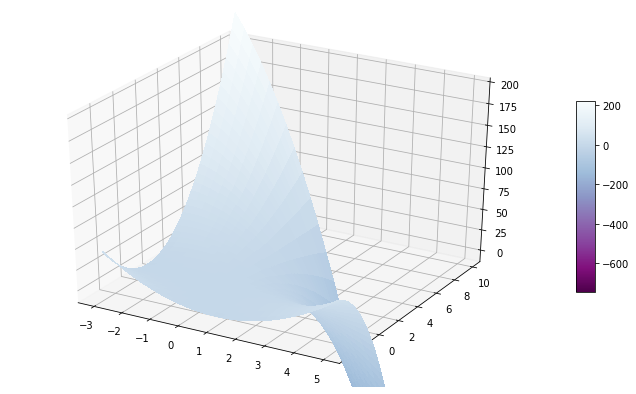

In [ ]:
K = lambda x,y,z: -x**2*y-x*y**2-x*y;
K1= lambda x,y,z: x*y
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-3, 5, 0.15)
Y = np.arange(-3, 10, 0.15)
Z = np.arange(-3, 13, 0.15)
X, Y= np.meshgrid(X, Y)
Zr = K(X,Y,Z)
Zr1 = K1(X, Y, Z)

# Plot the surface
surK = axRos.plot_surface(X, Y, Zr, cmap=cm.BuPu_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(-10, 200)
figRos.colorbar(surK, shrink=0.5, aspect=10)
plt.show()

# Observaciones


1.   Nuesta función objetivo presenta una caída abruta en el eje de las **y** donde se encuentra nuestro mínimo, sin embargo, los métodos "SLSQP" y "Trust constr" llegaron a puntos distintos pero no tan ditanciados.
2.   el método "trust-constr" requiere del cálculo de la matriz Jacobiana y 
Hessiana, lo cual puede contribuir a la dispersión del error por los cálculos. 
3.   La función objetivo de 3 variables complica un poco la evaluación de las restricciones, del mismo modo que la determinación su estado (activa o inactiva).
4.   Elemento de la lista





# Segundo ejemplo

## Minimizar $$x^2+y-x$$

## Sujeto a: 
$$9x^2-3\leq 9$$
$$x+2y\leq -1$$ 

## Cotas
$$1\leq x\leq 5$$
$$1\leq y\leq 3$$


# Matriz Jacobiana y Hessiana
$$ J_{R} (x,y)= \begin{pmatrix} 2x+1 \\ -1 \end{pmatrix}  $$ 

Hessiano de R:

$$ H_{R} (x,y)= \begin{pmatrix} 2 & 0  \\ 0 &  0\end{pmatrix}  $$ 

In [ ]:
#Definimos la función
def M(x):
   x1=x[0]
   x2=x[1]
   return x[0]**2+x[1]**2-x[0]

#Definimos las restricciones
def Restriccion1(x):
  return 9*x[0]**2+4*x[1]**2-9

def Restriccion2(x):
  return x[0]+2*x[1]+1

In [ ]:
#Matrices Jacobiana y Hessiana
def JM(x):
  der1 = np.zeros_like(x)
  der1[0]= 2*x[0]+1
  der1[1]= 2*x[1]
  return der1

def HM(x):
  x = np.asarray(x)
  H1 = [[2, 0], 
       [0, 2]]
  return H1

In [ ]:
#Definimos nuestro punto inicial x0
x01 = [3, 0.5 ]
#Definimos las cotas para las variables 
b1 = (1.0, 5.0)
c1 = (1.0, 3.0)
#cotas=optimize.Bounds([1, 3], [1, 3], [1, 2])
cotas1 = (b1,c1)


# Restricción lineal

In [ ]:
cons1 = {'type': 'ineq', 'fun':Restriccion2}

# Restricción no lineal

In [ ]:
cons2 = {'type': 'ineq', 'fun':Restriccion1}
consM = [cons1, cons2]

# Gráfica 2

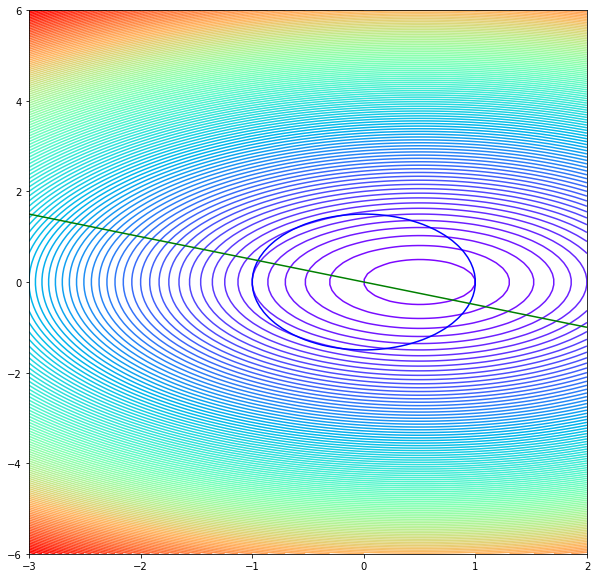

In [ ]:
plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z1, 150, cmap="rainbow") #nada, coolwarm
plt.plot(liX,liY, color='red')


## Restricciones
Co1 = 9*X**2+4*Y**2-9
plt.contour(X, Y, Co1, [0], colors='blue')

Co2=X+2*Y
plt.contour(X, Y, Co2, [0], colors='green')



plt.show()

# Método trust-constr

In [ ]:
res2 = optimize.minimize(M, x01, method='trust-constr', jac=JM, hess=HM, constraints=consM, bounds=cotas1)
print(res2)

 barrier_parameter: 3.200000000000001e-05
 barrier_tolerance: 3.200000000000001e-05
          cg_niter: 49
      cg_stop_cond: 4
            constr: [array([4.00009089]), array([4.00045622]), array([1.00000662, 1.00004214])]
       constr_nfev: [213, 213, 0]
       constr_nhev: [0, 0, 0]
       constr_njev: [0, 0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.17394042015075684
               fun: 1.000090894503484
              grad: array([3.00001324, 2.00008428])
               jac: [array([[1., 2.]]), array([[18.00011921,  8.00033723]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-8.03916933e-11,  2.20278240e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 71
              nhev: 16
               nit: 53
             niter: 53
              njev: 16
        optimality: 2.202782400928527e-09
            status: 1
           success: True
         tr_radius:

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


# Método SLSQP

In [ ]:
resM1 = minimize(M,x01,method = 'SLSQP',
               bounds = cotas1, constraints = consM)

print(resM1)


     fun: 1.0
     jac: array([1., 2.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1., 1.])


# Observaciones y conclusiones


1.   En este caso ambos métodos llegaron al punto mínimo, sin embargo "Trust-constr" demoró más iteraciones que "SLSQP".
2.   Se observa que las restricciones son inactivas pero la región factible que encierran permite hacer un buen acercamiento del mínimo.
3.   Es más fácil ver el problema con esta cantidad de variables, sin embargo, el resultado puede ser obtenido a través de cálculos manueales haciendo uso de los teoremas vistos en clase.
4.   Para un problema de más de 4 variables no es tan probechoso el cálculo de estas matrices ya que la disperción del error por las operacioces no permitirá que proceso sea confiable.
5.   El método "SLSQP" resultó ser más efectivo a la hora de minimizar los problemas propuestos.







# Referencias

Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

Luenberger, D. G., & Ye, Y. (1984). Linear and nonlinear programming. Reading, MA: Addison-wesley.